# Data Analysis and visualization for tracking developer productivity

Chipy's mentorship program is an extra-ordinary jounery for becoming a better developer. As a mentee, you are expected to do a lot - you read new articles/books, write code, debug and troubleshoot, pair program with other mentees in coding workshop or your mentor. This is involves managing time efficiently and doing the effective things. But as the old adage goes, "you can't manage what you can't measure".

This project is the third of the three part series of building tools for the mentees for tracking time. The end goal of such a tool will be to aggregate anonymous data and analyze how does a typical mentee spend on blogging (b), coding (c), debugging (d), pair program (p) with mentor or other mentees.

In this project we will be using `pandas` to analyze the data gathered by using the command line tool we built in the first part of the series. We will also be using `altair`, a visualization library to do some exploratory analysis of the data.

Short url for this page: http://bit.ly/

##  Is this project for you

Before you progress further, let's check if we are ready to solve this. You should

- Have a personal computer with working wifi and power cord
- Have Python 3 installed on your computer. *Yes, **Python 3** only* 😎
- Have some idea about lists, dictionaries and functions
- Have created a virtual environment and installing packages with `pip`

In addition, you should be familiar with [Part 1](https://github.com/chicagopython/CodingWorkshops/tree/master/problems/py101/trackcoder), and [Part 2](https://bit.ly/flask_trackcoder) of this three part exercise.

## Getting the project setup in your computer
If you are familiar with git, run


```
git clone https://github.com/chicagopython/CodingWorkshops.git
```

If not, go to https://github.com/chicagopython/CodingWorkshops

Click on the Download Zip and unzip the file that gets downloaded.

From your command line (terminal in mac osx, or linux and command prompt in windows), change directory to the path where you have downloaded it.


    On linux or OS X

      > cd path/to/CodingWorkshops/problems/data_science/

    On Windows

      > cd path\to\CodingWorkshops\problems\data_science

    
### Installation of Required packages

The following packages are needed for this project.

```
numpy==1.14.2
pandas==0.22.0
python-dateutil==2.7.2
pytz==2018.4
scikit-learn==0.19.1
scipy==1.0.1
six==1.11.0
sklearn==0.0
altair==2.2.2 
```
These packages are listed in the file `requirements.txt` in this directory.
From a terminal (in mac ox or linux) or command prompt (windows), install them using the following command.

```
pip install -r requirements.txt
```

Once the installation completed, start Jupyter notebook by issuing the command.
    
    > jupyter notebook

Running the following command here will open up a browser (http://localhost:8888)  and display all the notebooks under this directory.
Double click to open the `trackcoder` notebook.

Next execute the cell below by hitting `Shift + Enter`.

In [20]:
import pandas

If the above line executes without any error, then congratulations 🎉 - you have successfully installed everything, and ready to get started.

## Getting Started with Pandas

### Loading pandas

We will start off with an gentle introduction to `pandas` that is mostly taken from the [wonderful 10 minutes guide](https://pandas.pydata.org/pandas-docs/stable/10min.html). Lets start by importing the necessary packages.

In [21]:
import pandas as pd
import numpy as np

### Pandas Series and Dataframe

#### Series

A pandas `Series` is a one-dimensional labeled array capable of holding any data type. The axis labels are collectively referred to as the index. Lets create `series` from the different task types that we have defined in [Part 1](https://github.com/chicagopython/CodingWorkshops/tree/master/problems/py101/trackcoder#181-interactive-mode).

In [22]:
description = pd.Series(data=['blogging','coding','debugging','mentor','pair_programming', 'research'], 
                        index=['b', 'c', 'd','m','p','r'])
print(f"data: {description.values}\nindex: {description.index}")

data: ['blogging' 'coding' 'debugging' 'mentor' 'pair_programming' 'research']
index: Index(['b', 'c', 'd', 'm', 'p', 'r'], dtype='object')


#### DataFrame

A pandas `DataFrame` is a 2-dimensional labeled data structure where the columns can be of different data types. 

Lets create another series with number of minutes and same indexes as that of `description`.

In [23]:
mins = pd.Series([100,100,200,50,50,300], ['b', 'c', 'd', 'm', 'p', 'r'])

Now lets create a dataframe using `description` and `mins`.

In [24]:
d = {'description': description, 'mins': mins}

frame = pd.DataFrame(d)
frame

,description,mins
b,blogging,100
c,coding,100
d,debugging,200
m,mentor,50
p,pair_programming,50
r,research,300


### Loading the data

Next we will load the data present in the sqlite database in the folder `CodingWorkshops/problems/py101/trackcoder/`. If you choose to use a different dataset, all you need to do is change the value of `db` to the path of your file.

In [25]:
db="../py101/trackcoder/to_do_list.db"

In [26]:
import sqlite3
conn = sqlite3.connect(db)
df = pd.read_sql_query("select * from todo", conn)

### Viewing the data

In [27]:
df.head() #first 5 rows

,id,task,description,timestamp,mins,done
0,1,b,#asyncio blog post completed,2018-10-12 23:00:56.864056,30,1
1,2,b,#asyncio is really completicated,2018-10-12 23:01:21.875416,30,1
2,3,b,#data_science is really completicated,2018-10-12 23:03:26.697286,30,1
3,4,c,#asyncio completed stuff,2018-10-12 23:07:19.131405,30,1
4,5,m,#asyncio ask some questions,2018-10-12 23:08:09.363419,30,1


In [28]:
df.tail() # last 5 rows

,id,task,description,timestamp,mins,done
22,23,c,#pandas apply function to a dataframe,2018-11-04 05:39:13.803043,20,1
23,24,m,checking in with mentor,2018-11-04 05:43:03.523862,20,1
24,25,d,stupid typo-ed a comma!,2018-11-04 06:07:05.694163,20,1
25,26,d,#visualization trying to figure string type fo...,2018-11-04 07:00:06.893573,20,1
26,27,c,#visualization barchart created,2018-11-04 07:55:20.632394,20,1


### Fix data type

Pandas has the following data types.

```
object
int64
float64
bool
datetime64
timedelta[ns]
category
```

Notice that when we imported the data from our sqlite database, all the columns got imported as objects. Lets fix this by editing the data type of the column inplace, i.e. modify the data frame so that beyond this point this change will persist for the dataframe.

In [29]:
df['timestamp'] = df['timestamp'].astype('datetime64')
df['done'] = df['done'].astype('bool')
df.head()

,id,task,description,timestamp,mins,done
0,1,b,#asyncio blog post completed,2018-10-12 23:00:56.864056,30,True
1,2,b,#asyncio is really completicated,2018-10-12 23:01:21.875416,30,True
2,3,b,#data_science is really completicated,2018-10-12 23:03:26.697286,30,True
3,4,c,#asyncio completed stuff,2018-10-12 23:07:19.131405,30,True
4,5,m,#asyncio ask some questions,2018-10-12 23:08:09.363419,30,True


### Index, columns and summary

In [12]:
df.index

RangeIndex(start=0, stop=27, step=1)

Columns

In [13]:
df.columns

Index(['id', 'task', 'description', 'timestamp', 'mins', 'done'], dtype='object')

Quickly summarize the descriptive statistics

In [30]:
df.describe()

,id,mins
count,27.000000,27.000000
mean,14.000000,22.592593
std,7.937254,8.477387
min,1.000000,5.000000
25%,7.500000,20.000000
50%,14.000000,20.000000
75%,20.500000,30.000000
max,27.000000,30.000000


### Selecting data

Lets say we need to find the first three tasks, and get the values for timestamp and description of the task. Pandas provides a few ways to access the data from the dataframe - by label based indexes, numerical indexes or a hybrid approach.

Try them out by yourself, by running the code below.

```python
df[0:2] # gives you first three rows, all columns
df[0:2][['timestamp', 'description']] # returns a copy with only 'timestamp' and 'description'

df.iloc[0:2] # purely integer based indexing, similar to indexing in python. first three rows, all columns
df.iloc[0:2][['timestamp', 'description']]
df.iloc[[0,1,2],[2,3]]
```

In [31]:
df.iloc[[0,1,2],[2,3]]

,description,timestamp
0,#asyncio blog post completed,2018-10-12 23:00:56.864056
1,#asyncio is really completicated,2018-10-12 23:01:21.875416
2,#data_science is really completicated,2018-10-12 23:03:26.697286


To better understand how indexes work and show how the last two are different, lets make a copy of our dataframe.

In [16]:
_df = df.copy()

Lets set the index to be task instead of index pandas automatically provided us with.

In [17]:
_df.set_index('task', inplace=True)

Take a look at how the `_df` is different from `df`.

Now execute the following cells to find how different indexes can be used for selecting data.

```python
_df.loc['b'] # all rows matching task type b
_df.loc[_df['mins']==30, ['description','timestamp']] # returns only a dataframe where the mins equals 30
_df.loc[_df['mins']==30, 'description'] # returns a series where the mins equals 30
```

Finally, check how having different indexes change the way you access the data.

In [18]:
df.loc[0:2] # Purely label-location based indexer for selection by label. This works as index is an integer.
_df.loc[0:2] # Does not work

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

To understand more about how indexes work read through [Zax's tutorial on Pandas MultiIndex](http://www.zaxrosenberg.com/pandas-multiindex-tutorial/)

### Aggregation
Now that we have some idea about the basics, lets get into the actual analysis. Lets start by getting the total count of each type of task that we have in our dataset.

In [ ]:
df['task'].groupby(df['task']).count()

### What are the frequencies of each task type?
Note the above result is a Series. One approach can be to [reset the index](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.reset_index.html) of the series using the count of the task types and sort in the reverse order to get the list.

In [ ]:
df['task'].groupby(df['task']).count().reset_index(name='count').sort_values('count', ascending=False)

### What are the frequency of each task type per day?
Aggregation can be performed on multiple columns as well.

Hint: `pd.DatetimeIndex(df['timestamp']).date` [will extract date](https://stackoverflow.com/a/21954923/276569) from a timestamp.

In [ ]:
df[['task', 'timestamp']].groupby([pd.DatetimeIndex(df['timestamp']).date, 'task']).count()

### What are the amount of time spent per task type?

You can use the [`sum` function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html) to add up the minutes and sort them in reverse order.

In [ ]:
df[['task', 'mins']].groupby(df['task']).sum().sort_values('mins', ascending=False)

## Hashtag analysis

Hashtags are simple and easy way to put contextual information and in our data we find them in task descriptions. A task description might have no hashtag at all, a single hashtag or multiple hashtags. To start we need to parse the hashtags out from the description using regular expression. The following shows how multiple hastags are parsed out from a singe description.

```python
description = pd.Series(['#altair #pandas at project night'])
description.str.findall(r'#.*?(?=\s|$)').tolist()
```


Note the result returned by running the above snippet is a list of lists. You probably want to flatten the list.

### Make a series of unique list of hashtags

In [ ]:
import itertools
l = df.description.str.findall(r'#.*?(?=\s|$)').tolist()
h = set(itertools.chain.from_iterable(l))
p = pd.Series(list(h))

### Which is the frequency of each hashtag?
Hint: Take a look at examples under the [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html) function.

In [32]:
from collections import defaultdict
d=defaultdict(int)
ht=df.description.str.findall(r'#.*?(?=\s|$)')

def count(x):
    for y in x:
        d[y]+=1
ht.apply(lambda x:count(x))
d

defaultdict(int,
            {'#asyncio': 8,
             '#data_science': 1,
             '#jinja': 1,
             '#bootstrap': 3,
             '#cft': 2,
             '#pandas': 6,
             '#visualization': 3,
             '#regular_expression': 1})

### Which hash tag consumes the most amount of time?

This solution to this one is similar to the one above. Keep in mind that you need to handle the conditions where there are no hashtags in a description.

In [33]:
f=pd.DataFrame([df['mins'], ht])

c=defaultdict(int)
def sum_minutes(mins, hashtags):
    t = mins//len(hashtags) if len(hashtags) else 0
    for p in hashtags:
        c[p]+= t

f.apply(lambda x:sum_minutes(*x.tolist()))
c

defaultdict(int,
            {'#asyncio': 240,
             '#data_science': 30,
             '#jinja': 30,
             '#bootstrap': 65,
             '#cft': 50,
             '#pandas': 85,
             '#visualization': 50,
             '#regular_expression': 10})

## Plotting wih Altair

Visualization is a powerful technique to find patterns in a dataset. It is also useful for communicate the findings of an analysis of a dataset. In the next section we will answer some simple questions about our dataset using visualization. While `matplotlib` is one of the most successful packages for the purpose, we will be using [`Altair`](https://altair-viz.github.io/) that provides a simple yet powerful declarative way of building charts.

Think of it as SQL, but for charts.

In [34]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

We need to enable the renderer based on which environment we are using - `notebook` for jupyter notebooks, `jupterlab` for jupyterlab etc.

### What are the frequencies of each task type?

Lets try to answer the same question we solved above, but this time using `altair`.

Below is a `bar diagram` of our data. Lets break down what is going on in the function. From the official documentation:

> The key to creating meaningful visualizations is to map properties of the data to visual properties in order to effectively communicate information. In Altair, this mapping of visual properties to data columns is referred to as
> an encoding, and is most often expressed through the Chart.encode() method.

Here are the 3 steps for building charts in altair

- pass your data to alt.Chart
```python
alt.Chart(df)
```
- select the type of chart you want to plot
```python    
alt.Chart(df).mark_bar()
```
- `encode` map the property of the data to visual properties
```python
alt.Chart(df).mark_bar().encode(
    y='task'      # map the y axis to df['task']
    x='count()'   # map the x axis to aggregate function of count defined in altair
    color='task') # map the color to df['task']
```

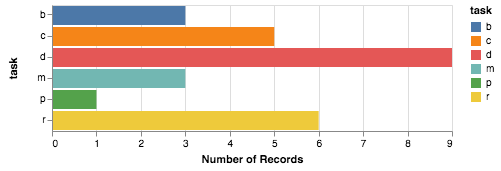

In [35]:
alt.Chart(df).mark_bar().encode(
    y='task',
    x='count()',
    color='task'
)

You can choose different chart types by changing `mark_bar` to `mark_point`, `mark_square`, `mark_geoshape` etc. as applicable for your data. Full list is [here](https://altair-viz.github.io/user_guide/marks.html)

### What are the frequencies of each task type per day?

### What are the amount of time spent per task type?
Lets get started with checking how much time has been spent in each task type.

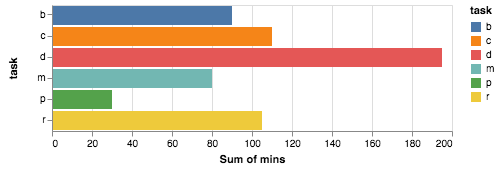

In [36]:
chart_mins = alt.Chart(df).mark_bar().encode(
    y='task',
    x='sum(mins)',
    color='task' 
)
chart_mins

### Align these charts

Altair makes it easy to build [compound charts](https://altair-viz.github.io/user_guide/compound_charts.html) by combining multiple charts. Arrange the charts above vertically and horizontally.

## Feedback

Thanks for attending this project night. We put in a lot of effort to make this useful for you. However, we can not make it better, unless we hear back from you on what you want and collect data to make changes. Please take a few moments to fill in the small form below and help us improve it.
PLease provide your feedback here.

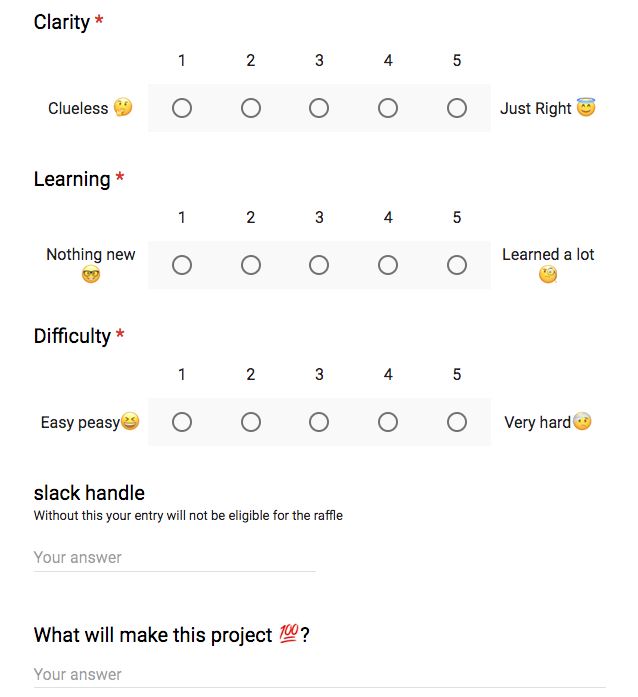

In [10]:
from IPython.display import Image
Image(filename='../../docs/feedback.png')